Importing the libraries

In [147]:
import numpy as np
import pandas as pd
import os, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import librosa
import librosa.display
%matplotlib inline

Importing the required data

In [148]:
audio_mnist_training_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_mfccs.txt')
audio_mnist_training_labels = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_labels.txt').reshape(-1, 1)

The Audio MNIST training set contains 2400 samples with 900 MFC coefficients each.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

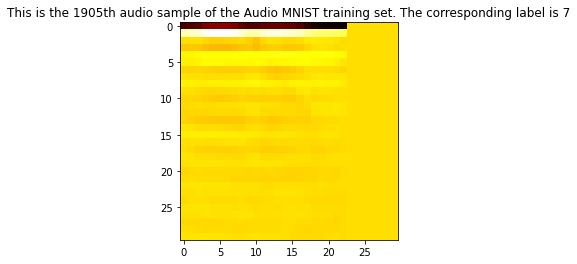

In [149]:
print("The Audio MNIST training set contains {s} samples with {p} MFC coefficients each.".format(s = audio_mnist_training_mfccs.shape[0], \
        p = audio_mnist_training_mfccs.shape[1]))

item_number = np.random.randint(low=0, high=2400)

plt.imshow(audio_mnist_training_mfccs[item_number].reshape(30, 30), cmap='hot')
plt.title("This is the {n}th audio sample of the Audio MNIST training set. The corresponding label is {l}".format( \
            n= item_number, l=int(audio_mnist_training_labels[item_number][0])))
plt.tight_layout

In [150]:

df=pd.DataFrame(audio_mnist_training_mfccs)
df['label'] =audio_mnist_training_labels.astype(int)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,label
0,-388.500305,-440.352600,-502.921875,-516.278870,-525.682434,-521.380127,-519.283020,-523.684753,-520.529175,-478.866180,...,6.576453,9.443312,6.769020,3.878198,1.093867,1.110493,-0.417849,-4.568942,-6.523507,0
1,-462.871307,-445.663788,-421.882507,-382.277863,-355.321136,-351.961273,-353.766663,-350.711029,-361.763733,-375.541840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,-452.487213,-429.940308,-417.119049,-404.386261,-380.008423,-361.944946,-356.141510,-352.765839,-349.870911,-362.951904,...,2.335657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,-459.929352,-435.518555,-421.249359,-391.013397,-353.172943,-341.304138,-332.169006,-334.234650,-338.372986,-337.583008,...,-8.136976,-4.376896,-1.517604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,-415.115753,-380.700470,-364.042755,-343.932404,-335.777008,-337.256165,-335.528809,-332.170227,-333.991577,-353.383728,...,-7.899344,-2.855740,-1.100652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [151]:
print (audio_mnist_training_mfccs.mean(axis=1))
print (audio_mnist_training_mfccs.var(axis=1))

[-13.88185235  -8.26082565  -8.87601785 ...  -6.70594501  -6.00281653
  -6.08288715]
[7343.17252373 5031.53311258 5531.37301877 ... 8798.3727984  7528.74341066
 7200.93304515]


Sample_rate from librosa 22050
feature - normalized value from librosa [-0.00679896 -0.01424026 -0.0169149  ... -0.00271908 -0.00141177
  0.        ]


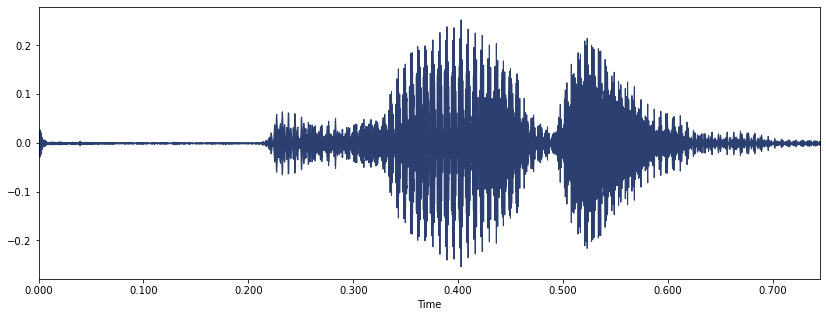

In [152]:
file='AudioMNIST/Audio/Training/0_george_10.wav'
plt.figure(figsize=(14,5))
aud,sr=librosa.load(file)
librosa.display.waveplot(aud,color='#2C3F71')  
print("Sample_rate from librosa",sr) 
print("feature - normalized value from librosa",aud) 

In [153]:
#for saving the images for MFCC into appropriate files according to the digit

#import pathlib
#import os

#plt.figure(figsize=(8,8))
#Digit = '0 1 2 3 4 5 6 7 8 9'.split()
#print(Digit)
#for i in Digit:
#    pathlib.Path(f'img_data/{i}').mkdir(parents=True, exist_ok=True)
#    for filename in os.listdir(f'./AudioMNIST/Audio/Training'):
#        if filename.startswith(i):
#            audn = f'./AudioMNIST/Audio/Training/{filename}'
#            y, sr = librosa.load(audn, mono=True, duration=5)
#            plt.imshow(audio_mnist_training_mfccs[item_number].reshape(30, 30), cmap='hot')
#            plt.axis('off');
#            plt.savefig(f'img_data/{i}/{filename[:-3].replace(".", "")}.png')
#            plt.clf()

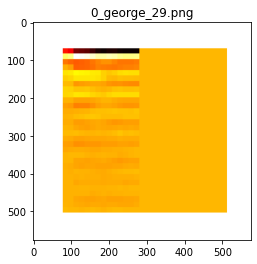

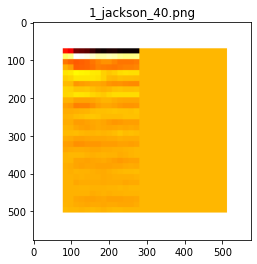

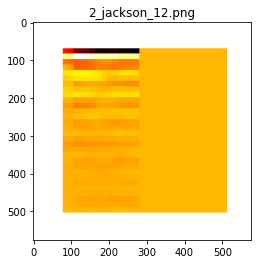

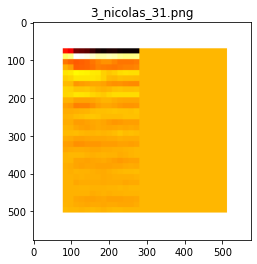

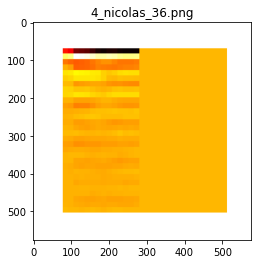

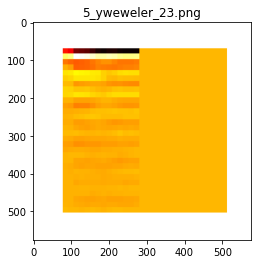

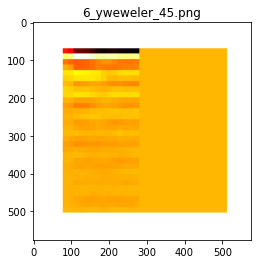

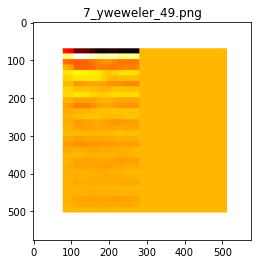

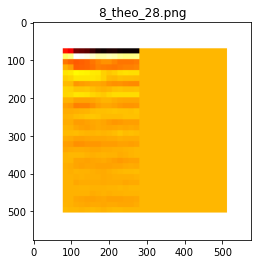

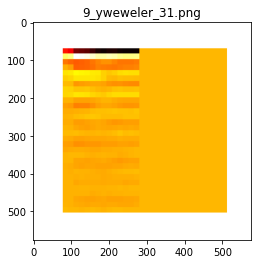

In [154]:


Digit = '0 1 2 3 4 5 6 7 8 9'.split()

#print random MFCC images stored in img_data file
for i in Digit:
    filename = random.choice(os.listdir(f'img_data/{i}'))
    file=os.path.join(f'img_data/{i}', filename)
    img = mpimg.imread(file)
    imgplot = plt.imshow(img)
    plt.title(filename)
    plt.tight_layout
    plt.show()

In [155]:
def standardise(data_matrix):
    P=data_matrix
    row_means = np.mean(data_matrix, axis=0)
    std_matrix = P - row_means
    row_stds = np.std(std_matrix, axis=0)
    return (std_matrix / row_stds), row_means, row_stds

def linear_regression_data(data_inputs):
    col=np.ones((len(data_inputs), 1))
    mat=np.c_[col,data_inputs]
    return mat

def one_hot_vector_encoding(labels):
    N = np.max(labels) + 1
    output = np.zeros((len(labels), N))
    output[np.arange(len(labels)), labels] = 1
    return output

def lasso_logistic_regression_cost_function(data_matrix, weight_matrix,
                                            one_hot_vector_encodings,
                                            regularisation_parameter):
    MSE=multinomial_logistic_regression_cost_function(data_matrix, weight_matrix,one_hot_vector_encodings)
    a=regularisation_parameter
    return MSE+a * np.sum(np.abs(weight_matrix))

def multinomial_logistic_regression_cost_function(data_matrix, weight_matrix,
                                                  one_hot_vector_encodings):
    s=len(data_matrix)
    mod = data_matrix @ weight_matrix
    return (np.sum(np.log(np.sum(np.exp(mod), axis=1)) \
                   - np.sum(one_hot_vector_encodings * mod, axis=1)))/s

def multinomial_logistic_regression_gradient(data_matrix, weight_matrix,
                                             one_hot_vector_encodings):
    mod = data_matrix @ weight_matrix
    s=len(data_matrix)
    return (data_matrix.T @(softmax_function(mod, axis=1) - one_hot_vector_encodings))/s

def soft_thresholding(argument, threshold):
    return np.sign(argument) * np.maximum(0, np.abs(argument) - threshold)

def softmax_function(argument, axis=None):
    if axis == None:
        output = np.exp(argument - np.max(argument))
        output = output / np.sum(output)
    else:
        output = np.exp(argument - np.expand_dims(np.max(argument, axis), axis))
        output = output / np.expand_dims(np.sum(output, axis), axis)
    return output

def linear_model_function(data_matrix, weights):
    P=data_matrix
    W=weights
    return P@W

def proximal_gradient_descent(objective,
                              gradient,
                              proximal_map,
                              initial_weights,
                              step_size=1,
                              no_of_iterations=1000,
                              print_output=100):
    obj_list=[]
    W=initial_weights
    print(gradient)
    obj_list.append(objective(W))
    N=no_of_iterations
    s=step_size
    for i in range(N):
        W=proximal_map(W-s*gradient(W))
        obj_list.append(objective(W))
        if (i+1)%print_output==0:
            print("Iteration {k}/{m}, objective={o}.".format(k=i+1,m=no_of_iterations, o=obj_list[i]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=i+1,m=no_of_iterations, o=obj_list[i]))
    return W,obj_list

def multinomial_prediction_function(data_matrix, weight_matrix):
    Mod=linear_model_function(data_matrix, weight_matrix)
    return np.argmax(Mod, axis=1)

def gradient_descent_v2(objective, gradient, initial_weights, \
                        step_size=1, no_of_iterations=100, print_output=10, tolerance=1e-6):
    obj = []
    L=objective
    weights = np.copy(initial_weights)
    N=no_of_iterations
    obj.append(L(weights))
    
    for i in range(N):
        dL=gradient(weights)
        if np.linalg.norm(dL,2) <= tolerance:
            break
        weights -= step_size * dL
        obj.append(L(weights))
        
        if (i + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=i+1, m=N, o=obj[i]))
        
        
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=i+1, m=N, o=obj[i]))
    
    return weights, obj

def classification_accuracy(true_labels, recovered_labels):
    equal_labels = recovered_labels == true_labels
    return np.mean(equal_labels)

In [156]:
aud_data_inputs, aud_row_of_means, aud_row_of_stds = standardise(audio_mnist_training_mfccs)
audio_mnist_training_labels=np.squeeze(audio_mnist_training_labels)
audio_labels=audio_mnist_training_labels.astype(int)

In [157]:
print (aud_data_inputs.mean(axis=1))
print (aud_data_inputs.var(axis=1))

[-1.32145813 -0.42012707 -0.48319505 ...  0.08510476  0.06004648
  0.03982926]
[7.17679823 0.71614593 0.88559615 ... 0.42549882 0.41092291 0.40575815]


In [158]:
LASSO_regularisation_parameter = 1e-4

audio_data_matrix = linear_regression_data(aud_data_inputs) 
audio_OHV = one_hot_vector_encoding(audio_labels)

audio_LASSO_objective= lambda weight_matrix: lasso_logistic_regression_cost_function(audio_data_matrix,\
                                           weight_matrix, audio_OHV,LASSO_regularisation_parameter)
audio_LASSO_gradient = lambda weight_matrix:multinomial_logistic_regression_gradient(audio_data_matrix,\
                                                                                weight_matrix, audio_OHV)
Aud_step=len(audio_data_matrix)

audio_step_size = (3.9*Aud_step)/(np.linalg.norm(audio_data_matrix))**2 

k=LASSO_regularisation_parameter*audio_step_size
audio_initial_weights = np.zeros((audio_data_matrix.shape[1], audio_OHV.shape[1]))

proximal_map = lambda arg:soft_thresholding(arg, k)


LASSO_optimal_weights, LASSO_objective_values=proximal_gradient_descent\
            (audio_LASSO_objective,audio_LASSO_gradient,proximal_map, audio_initial_weights,\
             audio_step_size, 6000,1000)

<function <lambda> at 0x7fe940b0b550>
Iteration 1000/6000, objective=0.20575644520562872.
Iteration 2000/6000, objective=0.13965010754635823.
Iteration 3000/6000, objective=0.11281286400005475.
Iteration 4000/6000, objective=0.09781639325630262.
Iteration 5000/6000, objective=0.08811032501217206.
Iteration 6000/6000, objective=0.08126190820881694.
Iteration completed after 6000/6000, objective = 0.08126190820881694.


In [159]:
audio_L_recovered_labels = multinomial_prediction_function(audio_data_matrix,LASSO_optimal_weights)
audio_LASSO_classification_accuracy = classification_accuracy(audio_labels, audio_L_recovered_labels)
print("The classification accuracy for the dataset is {p} %.".format(p=100 * audio_LASSO_classification_accuracy))

#May be the case of over fitting since the accuracy is too high

The classification accuracy for the dataset is 99.45833333333334 %.


Splitting the data into training and testing data to obtain optimal weight and validate

In [160]:
def data_split(data_matrix, validation_ratio):
    data_size = len(data_matrix)
    validation_size = int(data_size*validation_ratio)
    rows_indexes = np.random.choice(data_size,validation_size, replace = False)
    validation_data = data_matrix[rows_indexes,:]
    training_data = np.delete(data_matrix, obj = rows_indexes, axis = 0)
    return training_data, validation_data

In [161]:
audio_split_data = np.c_[audio_mnist_training_mfccs,audio_mnist_training_labels]
training_data, validation_data = data_split(audio_split_data, 0.2)
X_train=training_data[:, :-1]
Y_train=training_data[:, -1].astype(int) - np.min(training_data[:, -1].astype(int))
X_test=validation_data[:, :-1]
Y_test=validation_data[:, -1].astype(int) - np.min(validation_data[:, -1].astype(int))

In [162]:
aud_split_data_inputs, aud_row_of_means, aud_row_of_stds = standardise(X_train)
audio_split_data_matrix = linear_regression_data(aud_split_data_inputs)
audio_split_OHV = one_hot_vector_encoding(Y_train)
audio_split_objective= lambda weight_matrix: multinomial_logistic_regression_cost_function(audio_split_data_matrix,\
                                                                        weight_matrix, audio_split_OHV)
audio_split_gradient = lambda weight_matrix:multinomial_logistic_regression_gradient(audio_split_data_matrix,\
                                                                        weight_matrix, audio_split_OHV)

s3=len(audio_split_data_matrix)

audio_split_step_size = (3.9*s3)/(np.linalg.norm(audio_split_data_matrix))**2
audio_sp_initial_weights = np.zeros((audio_split_data_matrix.shape[1], audio_split_OHV.shape[1]))


X_train_optimal_weights, X_train_audio_objective_values=gradient_descent_v2(audio_split_objective, audio_split_gradient,\
                      audio_sp_initial_weights, audio_split_step_size, 2000, 200, 1e-4)



Iteration 200/2000, objective = 0.5345310615435767.
Iteration 400/2000, objective = 0.3343818236638613.
Iteration 600/2000, objective = 0.25481638392994693.
Iteration 800/2000, objective = 0.21037236454200567.
Iteration 1000/2000, objective = 0.18126965036268317.
Iteration 1200/2000, objective = 0.16039786788918303.
Iteration 1400/2000, objective = 0.14452797686981397.
Iteration 1600/2000, objective = 0.13196104755528643.
Iteration 1800/2000, objective = 0.12170808928166217.
Iteration 2000/2000, objective = 0.11314954128042351.
Iteration completed after 2000/2000, objective = 0.11314954128042351.


In [163]:
X_audio_recovered_labels = multinomial_prediction_function(audio_split_data_matrix,X_train_optimal_weights)
audio_classification_accuracy = classification_accuracy(Y_train, X_audio_recovered_labels)
print("The classification accuracy for the training dataset is {p} %.".format(p=100 * audio_classification_accuracy))

The classification accuracy for the training dataset is 98.95833333333334 %.


In [164]:
test_data_inputs, test_row_of_means, test_row_of_stds = standardise(X_test)
test_data_matrix = linear_regression_data(test_data_inputs)
test_accuracy_rate = classification_accuracy(multinomial_prediction_function\
                                (test_data_matrix, X_train_optimal_weights),Y_test)
print("The classification accuracy for the training dataset is {p} %.".format(p=100*test_accuracy_rate))

The classification accuracy for the training dataset is 96.25 %.


Classification accuracy of training and testing data is comparable. So can say that the current model fits the data quite well

### K-Cross Validation using ridge regression

In [171]:
def KFold_split(data_size, K):
    np.random.seed(212)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)] \
                     for i in range(K)]
    return indexes_split

def KFold_cross_validation(data_matrix, data_outputs, K, model_evaluation,
                           error_evaluation):
    data_size = len(data_matrix)
    indexes_split = KFold_split(data_size, K)
    for i in range(K):
        indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        weights = model_evaluation(data_matrix[indexes], data_outputs[indexes])
        error = error_evaluation(data_matrix[indexes_split[i]],
                             data_outputs[indexes_split[i]], weights)
        if (i == 0):
            optimal_weights = weights / K
            validation_error = error / K
        else:
            optimal_weights += weights / K
            validation_error += error / K

    return optimal_weights, validation_error

def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]

def ridge_regression(data_matrix, data_outputs, regularisation=0):
    return np.linalg.solve(data_matrix.T @ data_matrix +regularisation * \
                np.identity(len(data_matrix.T)),data_matrix.T @ data_outputs)

def ridge_regression_data(data_inputs, degree=1):
    if (degree > 1 and data_inputs.ndim > 1):
        raise NotImplementedError()
    if (data_inputs.ndim == 1):
        X_matrix = np.ones((len(data_inputs), 1))
        for i in range(degree):
            X_matrix = np.c_[X_matrix, np.power(data_inputs, i + 1)]
    else:
        first_column = np.ones((len(data_inputs), 1))
        X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

def prediction_function(data_matrix, weights):
    return data_matrix @ weights

def prediction_error(data_matrix,data_outputs,weights):
    return 1/(2*len(data_matrix))*(np.linalg.norm(data_matrix@weights-data_outputs))**2

In [172]:
K=5
alpha_grid = np.append(np.array([i * 0.05 for i in range(20)]),\
                       np.array([i for i in range(1,20)]))

validation_error =lambda alpha: KFold_cross_validation(aud_data_inputs,audio_labels, K,\
                                                       lambda data_matrix,data_outputs: ridge_regression(data_matrix, data_outputs,regularisation = alpha), \
                                                       lambda data_matrix, data_outputs, weights: prediction_error(data_matrix, data_outputs, weights))[1]

optimal_alpha = grid_search(validation_error, alpha_grid)

optimal_weights = KFold_cross_validation(aud_data_inputs, audio_labels, K,\
                lambda data_matrix,data_outputs: ridge_regression(data_matrix, data_outputs, regularisation = optimal_alpha),\
                lambda data_matrix, data_outputs, weights: prediction_error(data_matrix, data_outputs, weights))[0]

print( "An optimal value of regularisation parameter is {}.\nFor this value of \
    regularisation parameter one gets optimal weights of the form \n{}"\
      .format(optimal_alpha, optimal_weights))

An optimal value of regularisation parameter is 19.0.
For this value of     regularisation parameter one gets optimal weights of the form 
[ 1.24127373e-02 -8.19504099e-02  1.83860163e-01  3.66319880e-02
 -2.43325070e-03 -4.29355873e-02 -4.78617871e-02 -5.57144580e-03
  2.17811038e-01 -6.46796694e-02 -4.09085804e-02 -5.00931305e-02
 -2.25856853e-01 -3.79198386e-02  3.45179210e-02 -2.40581464e-02
 -2.53207671e-01 -1.27400375e-01  3.02513218e-01 -7.18684953e-02
 -8.57684327e-02  7.32392923e-03 -2.86216718e-02  1.99001590e-01
  1.57996624e-01  4.28685501e-02  4.83406629e-01  8.94206209e-02
  1.43860633e-02 -2.59827860e-01 -1.15258570e-01  7.98836259e-02
  3.71384584e-01  2.16589093e-01  8.91566274e-02  4.60654339e-02
 -1.39815509e-01  6.24018453e-02 -6.53789836e-02 -5.28785781e-02
 -1.54453777e-02 -1.29696686e-01 -5.69880757e-01 -8.61925148e-02
  2.43056403e-01 -6.32163536e-02  3.16859100e-01  2.36078721e-01
  1.09130101e-01  1.51480445e-01 -8.57549274e-02 -4.74906904e-02
  1.33115756e-01